# Coffee Sales Analysis.

In [164]:
# importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
data = 'Coffee_Sales.csv' # Load the Dataset
df = pd.read_csv(data)
df.head()  # check first few rows.

,date,datetime,cash_type,card,money,coffee_name
0,01 March 2024,10:15:51,card,ANON-0000-0000-0001,38.7,Latte
1,01 March 2024,12:19:23,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,01 March 2024,12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,01 March 2024,13:46:33,card,ANON-0000-0000-0003,28.9,Americano
4,01 March 2024,13:48:15,card,ANON-0000-0000-0004,38.7,Latte


In [166]:
df.info()  # check data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3174 non-null   object 
 4   money        3263 non-null   float64
 5   coffee_name  3263 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.1+ KB


In [167]:
df.describe()  # Summary Statistics.

,money
count,3263.000000
mean,31.798682
std,4.939635
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [168]:
df['date'] = pd.to_datetime(df['date'])  # convert date column into datetime

In [169]:
# Convert to DateTime format
df['time'] = pd.to_datetime(df['datetime']).dt.strftime('%H:%M:%S')
df=df.drop(columns='datetime')

C:\Users\vasun\AppData\Local\Temp\ipykernel_23148\3700597956.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['datetime']).dt.strftime('%H:%M:%S')


In [170]:
df.head()

,date,cash_type,card,money,coffee_name,time
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:51
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:23
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:15


In [171]:
df.duplicated().sum() # count duplicate rows.

0

## Start Exploratory Data Analysis(EDA).

* Total Sales Per Day and Monthly Sales.


In [205]:
daily_sales = df.groupby('date')['money'].sum().reset_index()
daily_sales = daily_sales.nlargest(5,'money').head()
daily_sales

,date,money
221,2024-10-11,836.66
332,2025-02-03,796.00
334,2025-02-05,760.24
227,2024-10-17,726.46
353,2025-02-24,723.02


<Axes: title={'center': 'Daily Sales Trend'}, xlabel='date'>

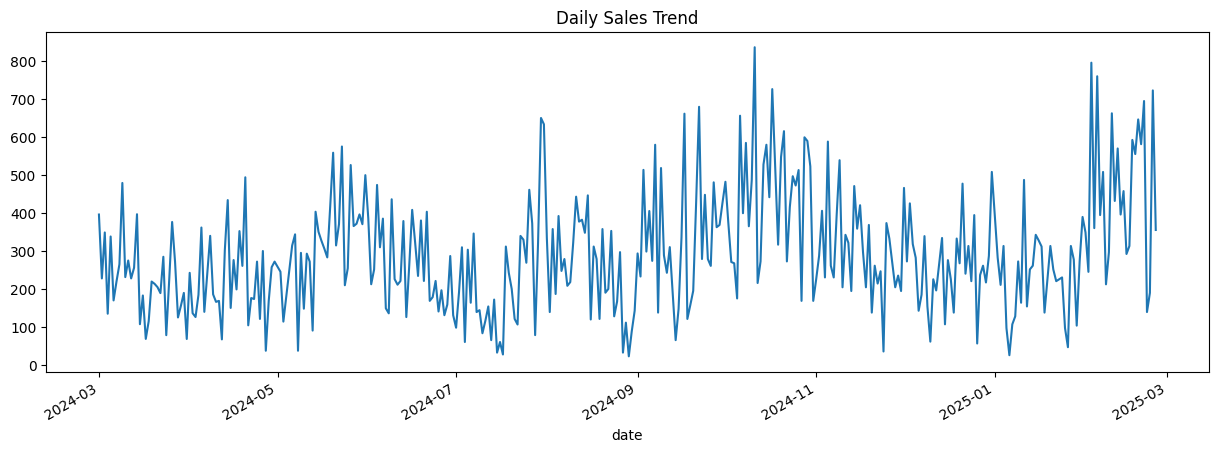

In [173]:
# Total Sales Per Day throughout the year
plt.figure(figsize=(15,5))
df.groupby('date')['money'].sum().plot(kind='line', title="Daily Sales Trend")

* To calculate monthly sales data.

In [174]:
# to group sales data by month and year
df['year_month'] = df['date'].dt.to_period('M')  # Creates "YYYY-MM" format

In [175]:
# sum up the sales (money column) per month
monthly_sales = df.groupby('year_month')['money'].sum().reset_index()
monthly_sales

,year_month,money
0,2024-03,7050.20
1,2024-04,6720.56
2,2024-05,9063.42
3,2024-06,7758.76
4,2024-07,6915.94
5,2024-08,7613.84
6,2024-09,9988.64
7,2024-10,13891.16
8,2024-11,8590.54
9,2024-12,8237.74


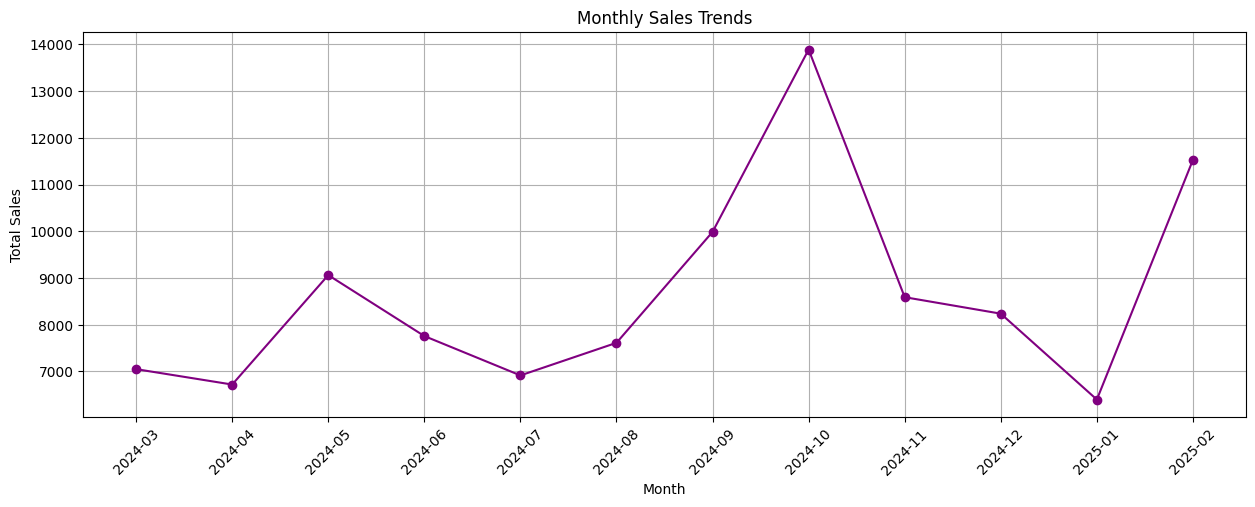

In [176]:
# visualize monthly sales
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['year_month'].astype(str), monthly_sales['money'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.grid(True)
plt.show()


* Payment method Preferences (Cash vs Card).

In [177]:
# Total Sales through cash and card type.
Payment_method= df.groupby('cash_type')['money'].sum().reset_index()
Payment_method

,cash_type,money
0,card,100573.1
1,cash,3186.0


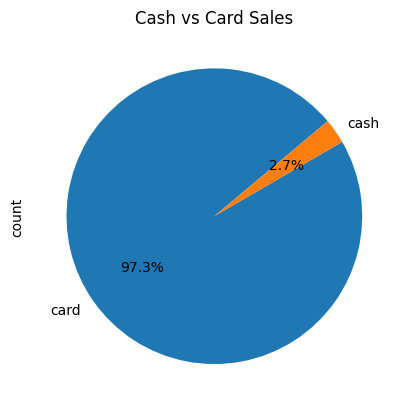

In [178]:
# Payment method in pie chart.
df['cash_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=40, title='Cash vs Card Sales')
plt.show()

* Customers Loyalty.

In [179]:
# Top 5 Most Loyal Customers.
df['card'].value_counts().head(5)

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
ANON-0000-0000-0507     50
Name: count, dtype: int64

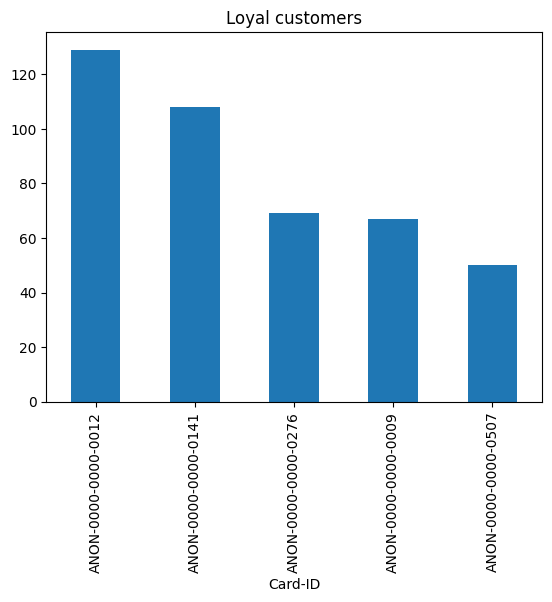

In [180]:
# plot a chart on Top 5 Loyal customers.
plt.Figure(figsize=(10,5))
df['card'].value_counts().head(5).plot(kind='bar', title='Loyal customers', xlabel='Card-ID')
plt.show()

* Peak Sales Analysis(On Hourly Basis).

C:\Users\vasun\AppData\Local\Temp\ipykernel_23148\3101424474.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


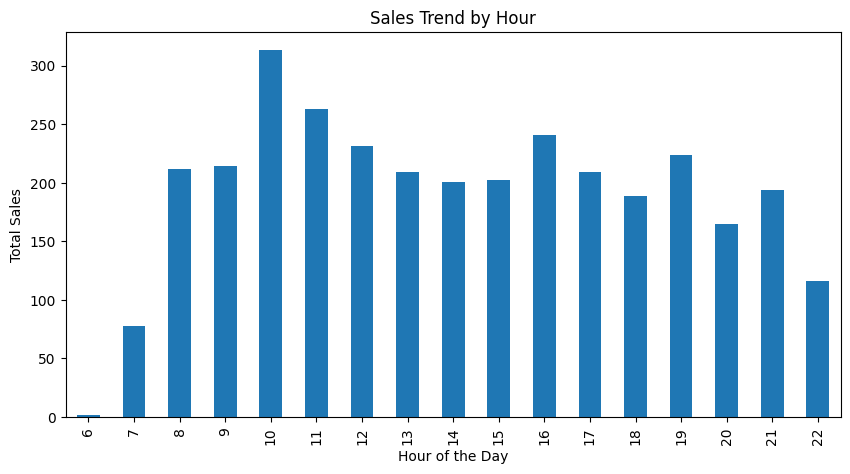

In [181]:
# Extract hour from time column
df['hour'] = pd.to_datetime(df['time']).dt.hour  

# Group by hour and sum sales
hourly_sales = df.groupby('hour')['coffee_name'].count()

plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.title("Sales Trend by Hour")
plt.show()

* Coffee Category Analysis.

In [203]:
# Coffee Sales By Category.
coffee_sales= df.groupby('coffee_name')['money'].sum()
coffee_sales

coffee_name
Americano              11973.02
Americano with Milk    23417.52
Cappuccino             16281.90
Cocoa                   7390.80
Cortado                 7456.98
Espresso                2561.56
Hot Chocolate           9242.70
Latte                  25434.62
Name: money, dtype: float64

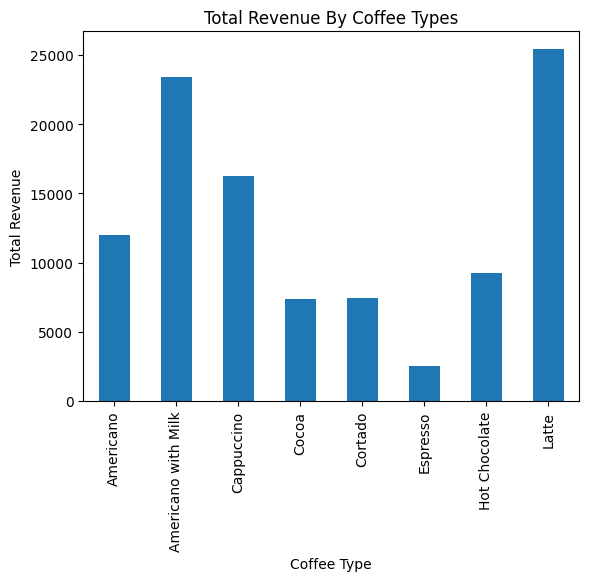

In [183]:
# visualization on Coffee Category.
plt.Figure(figsize=(10,5))
coffee_sales.head(8).plot(kind='bar')
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue By Coffee Types')
plt.show()

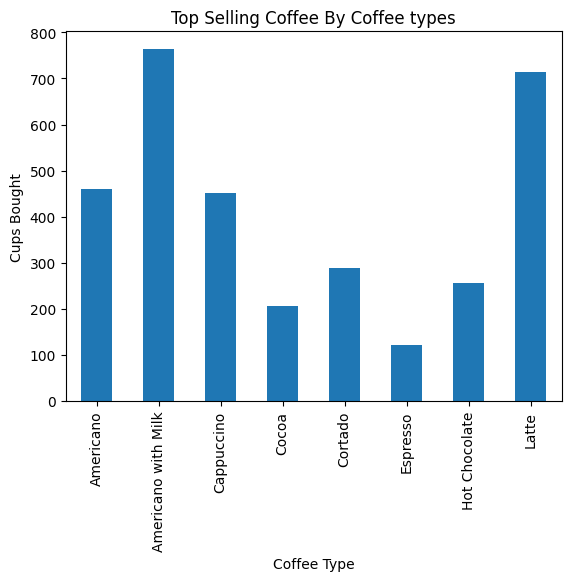

In [207]:
# Top Selling Coffee Type.
coffee_sales= df.groupby('coffee_name')['money'].count()

# plot the figure on Top Selling Coffee by there Types.
plt.Figure(figsize=(10,5))
coffee_sales.head(8).plot(kind='bar')
plt.xlabel('Coffee Type')
plt.ylabel('Cups Bought')
plt.title('Top Selling Coffee By Coffee types')
plt.show()

* Finding the Best Sales Day of the Week.

In [209]:
# Extract day of the week.
df['day_of_week'] = df['date'].dt.day_name()

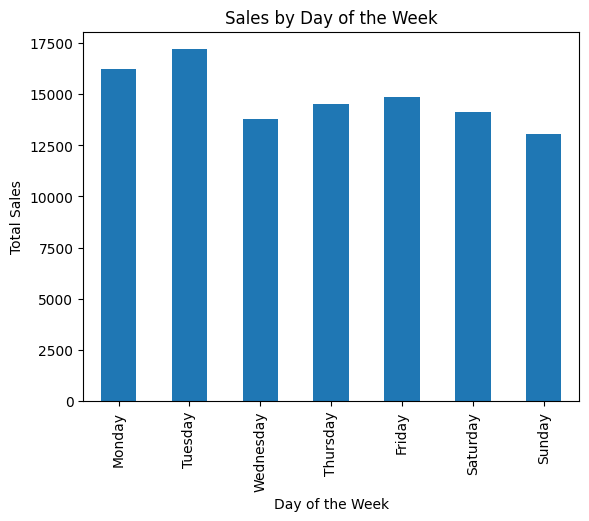

In [210]:
# Group by day and sum sales.
day_sales= df.groupby('day_of_week')['money'].sum()

# Sort the day name by sales.
day_sales=day_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the bar chart.
plt.Figure(figsize=(10,5))
day_sales.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales by Day of the Week')
plt.show()

* Top 5 most sold Coffee name.

In [216]:
# Get Top 5 Coffee
top_5_Coffee_Sold= df.groupby('coffee_name')['money'].sum().reset_index()
top_5_Coffee_Sold=top_5_Coffee_Sold.nlargest(5,'money').head(5)
top_5_Coffee_Sold

,coffee_name,money
7,Latte,25434.62
1,Americano with Milk,23417.52
2,Cappuccino,16281.90
0,Americano,11973.02
6,Hot Chocolate,9242.70


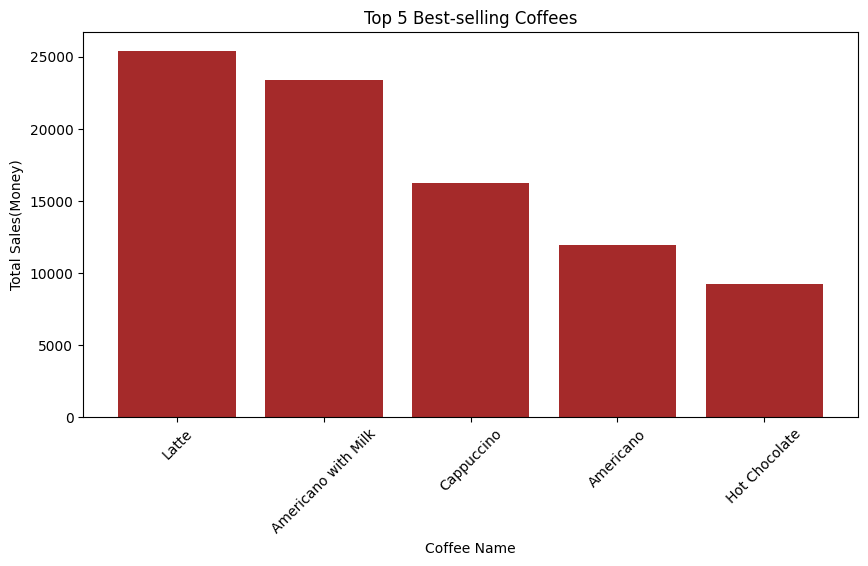

In [199]:
plt.figure(figsize=(10,5))
plt.bar(top_5_Coffee_Sold['coffee_name'], top_5_Coffee_Sold['money'], color='brown')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales(Money)')
plt.title('Top 5 Best-selling Coffees')
plt.xticks(rotation=45) # Rotate labels for better visibility.
plt.show()